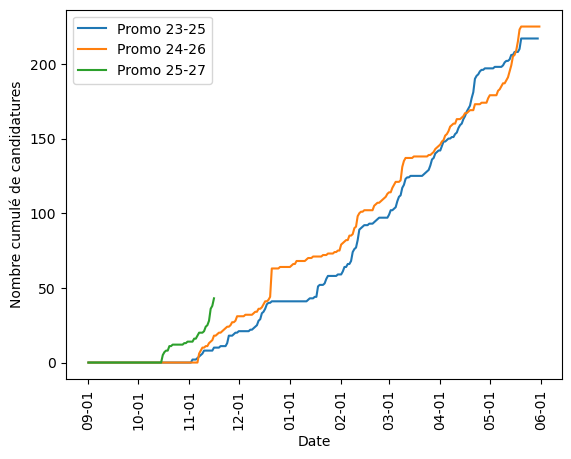

In [115]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('./dates.csv')
cols=df.columns
candidatures = pd.to_datetime([elt  for elt in np.concatenate((df[cols[0]],df[cols[1]], df[cols[2]])) if elt == elt])
dates_2022_2023 = pd.date_range(start='2022-09-01', end='2023-05-31', freq='D')
dates_2023_2024 = pd.date_range(start='2023-09-01', end='2024-05-31', freq='D')
dates_2024_2025 = pd.date_range(start='2024-09-01', end='2025-05-31', freq='D')
dates = pd.date_range(start=candidatures.min(), end=candidatures.max(), freq='D')

count = np.zeros(len(dates))
count_2022 = np.zeros(len(dates_2022_2023))
count_2023 = np.zeros(len(dates_2023_2024))
count_2024 = np.zeros(len(dates_2024_2025))

for i in range(len(dates_2022_2023)):
    count_2022[i] = len([elt for elt in candidatures if elt == dates_2022_2023[i]])

for i in range(len(dates_2023_2024)):
    count_2023[i] = len([elt for elt in candidatures if elt == dates_2023_2024[i] ])


for i in range(len(dates_2024_2025)):
    count_2024[i] = len([elt for elt in candidatures if elt == dates_2024_2025[i] ])


année_scolaire= pd.date_range(start='2023-09-01', end='2024-07-31', freq='D')

idxs=[]
for date in [ '2023-09-01', '2023-10-01', '2023-11-01', '2023-12-01', '2024-01-01','2024-02-01', '2024-03-01', '2024-04-01', '2024-05-01', '2024-06-01']: 
    idxs.append(année_scolaire.get_loc(date))


plt.plot(range(273),np.cumsum( count_2022), label='Promo 23-25')
plt.plot(range(274),np.cumsum( count_2023), label='Promo 24-26')
plt.plot(range(77),(np.cumsum(count_2024)[:77]), label='Promo 25-27')
plt.xlabel('Date')
plt.legend()
plt.ylabel('Nombre cumulé de candidatures')
plt.xticks(rotation=90)
plt.xticks(idxs, [ '09-01', '10-01', '11-01', '12-01', '01-01','02-01', '03-01', '04-01', '05-01', '06-01' ])
plt.show()